In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
from IPython.display import display, HTML

In [2]:
#From
#https://www.kaggle.com/lucidlenn/sloan-digital-sky-survey
sdss=pd.read_csv('Skyserver_SQL2_27_2018 6_51_39 PM.csv')

In [3]:
sdss.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   objid      10000 non-null  float64
 1   ra         10000 non-null  float64
 2   dec        10000 non-null  float64
 3   u          10000 non-null  float64
 4   g          10000 non-null  float64
 5   r          10000 non-null  float64
 6   i          10000 non-null  float64
 7   z          10000 non-null  float64
 8   run        10000 non-null  int64  
 9   rerun      10000 non-null  int64  
 10  camcol     10000 non-null  int64  
 11  field      10000 non-null  int64  
 12  specobjid  10000 non-null  float64
 13  class      10000 non-null  object 
 14  redshift   10000 non-null  float64
 15  plate      10000 non-null  int64  
 16  mjd        10000 non-null  int64  
 17  fiberid    10000 non-null  int64  
dtypes: float64(10), int64(7), object(1)
memory usage: 1.4+ MB


In [4]:
## Convert class column to integer
sdss["class"]=np.where(sdss["class"]=='QSO','2',sdss["class"])#.astype(int)
sdss["class"]=np.where(sdss["class"]=='STAR','0',sdss["class"])#.astype(int)
sdss["class"]=np.where(sdss["class"]=='GALAXY','1',sdss["class"])#.astype(int)
sdssc=sdss.astype({'class':int})
sdssc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   objid      10000 non-null  float64
 1   ra         10000 non-null  float64
 2   dec        10000 non-null  float64
 3   u          10000 non-null  float64
 4   g          10000 non-null  float64
 5   r          10000 non-null  float64
 6   i          10000 non-null  float64
 7   z          10000 non-null  float64
 8   run        10000 non-null  int64  
 9   rerun      10000 non-null  int64  
 10  camcol     10000 non-null  int64  
 11  field      10000 non-null  int64  
 12  specobjid  10000 non-null  float64
 13  class      10000 non-null  int32  
 14  redshift   10000 non-null  float64
 15  plate      10000 non-null  int64  
 16  mjd        10000 non-null  int64  
 17  fiberid    10000 non-null  int64  
dtypes: float64(10), int32(1), int64(7)
memory usage: 1.3 MB


In [5]:
sdssc.describe()

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.0,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,1.237650e+18,175.529987,14.836148,18.619355,17.371931,16.840963,16.583579,16.422833,981.034800,301.0,3.648700,302.380100,1.645022e+18,0.669800,0.143726,1460.986400,52943.533300,353.069400
std,0.000000e+00,47.783439,25.212207,0.828656,0.945457,1.067764,1.141805,1.203188,273.305024,0.0,1.666183,162.577763,2.013998e+18,0.625465,0.388774,1788.778371,1511.150651,206.298149
min,1.237650e+18,8.235100,-5.382632,12.988970,12.799550,12.431600,11.947210,11.610410,308.000000,301.0,1.000000,11.000000,2.995780e+17,0.000000,-0.004136,266.000000,51578.000000,1.000000
25%,1.237650e+18,157.370946,-0.539035,18.178035,16.815100,16.173333,15.853705,15.618285,752.000000,301.0,2.000000,184.000000,3.389248e+17,0.000000,0.000081,301.000000,51900.000000,186.750000
50%,1.237650e+18,180.394514,0.404166,18.853095,17.495135,16.858770,16.554985,16.389945,756.000000,301.0,4.000000,299.000000,4.966580e+17,1.000000,0.042591,441.000000,51997.000000,351.000000
75%,1.237650e+18,201.547279,35.649397,19.259232,18.010145,17.512675,17.258550,17.141447,1331.000000,301.0,5.000000,414.000000,2.881300e+18,1.000000,0.092579,2559.000000,54468.000000,510.000000
max,1.237650e+18,260.884382,68.542265,19.599900,19.918970,24.802040,28.179630,22.833060,1412.000000,301.0,6.000000,768.000000,9.468830e+18,2.000000,5.353854,8410.000000,57481.000000,1000.000000


<AxesSubplot:xlabel='ra', ylabel='dec'>

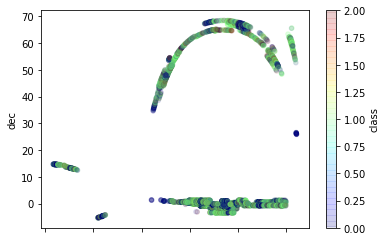

In [6]:
#Visualize the data
sdssc.plot(kind="scatter",x="ra",y="dec",c="class",alpha=0.1,cmap=plt.get_cmap("jet"),colorbar=True)

<AxesSubplot:xlabel='redshift', ylabel='plate'>

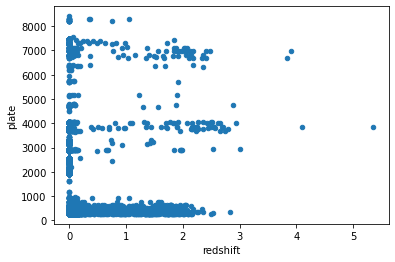

In [7]:
sdssc.plot(kind="scatter",x='redshift',y='plate')
#This is going to cause problems, because there are really weird, nonlinear correlations that will mess things up

(8000, 18)
(8000,)


(array([6.424e+03, 9.300e+02, 5.100e+01, 3.300e+01, 2.900e+01, 2.300e+01,
        2.900e+01, 2.900e+01, 3.300e+01, 2.700e+01, 3.100e+01, 3.800e+01,
        4.000e+01, 3.100e+01, 3.500e+01, 3.900e+01, 3.800e+01, 3.600e+01,
        2.800e+01, 2.300e+01, 1.800e+01, 1.000e+01, 4.000e+00, 9.000e+00,
        3.000e+00, 2.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00,
        1.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00]),
 array([-4.13607800e-03,  1.03023724e-01,  2.10183525e-01,  3.17343327e-01,
         4.24503128e-01,  5.31662930e-01,  6.38822731e-01,  7.45982533e-01,
         8.53142334e-01,  9.60302136e-01,  1.06746194e+00,  1.17462174e+00,
         1.28178154e+00,  1.38894134e+00,  1.49610114e+00,  1.60326095e+00,
         1.71042075e+00,  1.81758055e+00,  1.92474035e+00,  2.03190015e+

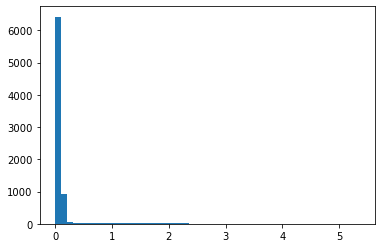

In [8]:
#Get a training set 
X_train_full=sdssc[:8000]
y_train_label=X_train_full["redshift"]
print(X_train_full.shape)
print(y_train_label.shape)
# Look at correlations
corr_matrix=X_train_full.corr()
corr_matrix["redshift"].sort_values(ascending=False)
#corr_matrix["class"].sort_values(ascending=False)
plt.hist(y_train_label,bins=50)

In [9]:
X_train=X_train_full.drop("redshift",axis=1)#,inplace=True)
print(X_train_full.shape,X_train.shape)

(8000, 18) (8000, 17)


Score= 0.0016531700517375958


'The coefficient R^2 is defined as (1-u/v), where u is the residual \nsum of squares ((y_true - y_pred) ** 2).sum() and v is the total sum \nof squares ((y_true - y_true.mean()) ** 2).sum()'

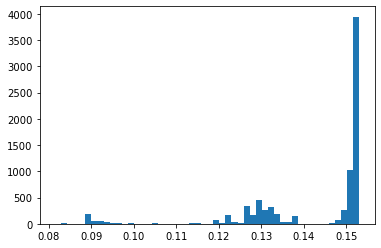

In [10]:
from sklearn.linear_model import LinearRegression
lin_reg=LinearRegression()
result=lin_reg.fit(X_train,y_train_label)
plt.hist(lin_reg.predict(X_train),bins=50)
##There are a variety of scores one can use.
## The simplest is the one in the method:
print('Score= '+str(lin_reg.score(X_train,y_train_label)))
'''The coefficient R^2 is defined as (1-u/v), where u is the residual 
sum of squares ((y_true - y_pred) ** 2).sum() and v is the total sum 
of squares ((y_true - y_true.mean()) ** 2).sum()'''


In [11]:
### Clearly, does not work so well. Let's see why.
### Some of its attributes
coeff=result.coef_
print((coeff))
### The problem is the mismatched amplitudes of the features


[ 0.00000000e+00  0.00000000e+00 -7.96125723e-39  4.34312738e-40
  2.30512715e-40 -4.42178733e-41 -2.84927669e-40 -4.81478089e-40
 -1.02213364e-37  0.00000000e+00 -3.14741924e-40  7.82721195e-38
 -7.79923896e-21  1.11573398e-39 -6.92706915e-36 -5.63166380e-36
 -1.90087289e-37]


[ 4.48504705e-20 -1.75893032e-04 -2.81986867e-04 -8.16875598e-02
  3.55724847e-02 -1.97856117e-01  1.12761866e-02  2.57777170e-01
 -2.25890893e-05  3.39520921e-06  1.00917842e-03  9.62363583e-05
  3.33518524e-15  5.09374750e-01 -3.75513168e+00  1.23636302e-04
 -9.28423057e-04]
[-0.26273883 -0.2934733 ]
0   -0.000009
1   -0.000055
Name: redshift, dtype: float64
Score= 0.602636608570996


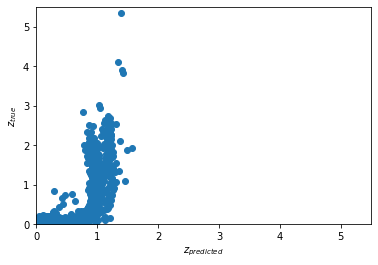

In [12]:
### Do it again this time normalizing:
lin_reg=LinearRegression(normalize=True)
result_norm=lin_reg.fit(X_train,y_train_label)
coeff_norm=result_norm.coef_
print(coeff_norm)
print(lin_reg.predict(X_train[:2]))
#print((X_train_full[:2]))
print(y_train_label[:2])
#plt.hist(lin_reg.predict(X_train_full),bins=50)
plt.scatter(lin_reg.predict(X_train),y_train_label)
plt.xlabel('$z_{predicted}$')
plt.ylabel('$z_{true}$')
plt.axis([0,5.5,0,5.5])
print('Score= '+str(lin_reg.score(X_train,y_train_label)))


In [13]:
### This does better but still not well. 
### Look at the coefficients that are largest here are:
ind=np.argsort(np.abs(coeff_norm))
for i in ind:
    print(X_train.columns[i],coeff_norm[i])
print(X_train.columns)

objid 4.485047054206497e-20
specobjid 3.3351852406860172e-15
rerun 3.3952092053368688e-06
run -2.2589089291570052e-05
field 9.623635825585341e-05
mjd 0.00012363630172543993
ra -0.00017589303247209754
dec -0.0002819868673331473
fiberid -0.0009284230567348203
camcol 0.0010091784215434196
i 0.011276186609458127
g 0.03557248472828627
u -0.08168755979064625
r -0.19785611656605584
z 0.25777716985760146
class 0.5093747501062732
plate -3.7551316840451694
Index(['objid', 'ra', 'dec', 'u', 'g', 'r', 'i', 'z', 'run', 'rerun', 'camcol',
       'field', 'specobjid', 'class', 'plate', 'mjd', 'fiberid'],
      dtype='object')


It makes sense that the colors and the type have relatively large coefficients and the class since stars will have very low redshifts and galaxies and QSO'S will have much larger ones. (It does not make sense to me that plate carries any weight.) Indeed it seems likely that the problem is that the class coefficient is trying to push all the stars to have low z and might even be doing that correctly. Let's see.

()


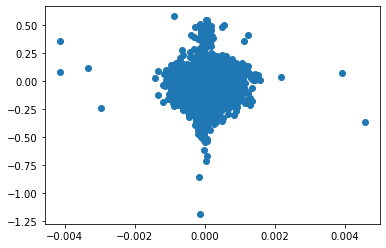

In [14]:
stars=X_train[X_train["class"]==0]
starz=y_train_label[X_train["class"]==0]
print(np.shape(result_norm))
stars_predict=result_norm.predict(stars)
plt.scatter(starz,stars_predict)
plt.show()

Still does not do very well. Let's fit the stars only

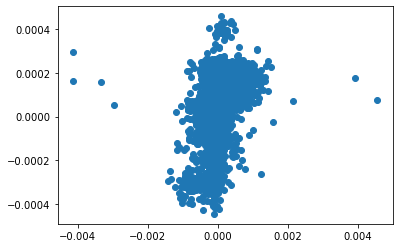

In [15]:
stars_predict=lin_reg.fit(stars,starz)
plt.scatter(starz,stars_predict.predict(stars))
plt.show()

In [16]:
#Still does not do well; let's look at the coefficients:
stars_co=stars_predict.coef_
ind=np.argsort(np.abs(stars_co))
for i in ind:
    print(X_train.columns[i],stars_co[i])


objid 1.6613260577500934e-23
specobjid -1.1614198926006506e-18
class -3.799698333750712e-10
rerun -9.282601354243525e-10
mjd 3.444993737259467e-08
run -3.2975994743223157e-07
fiberid 3.2988633699389294e-07
field -7.762013347266046e-07
camcol -1.0170333445233878e-06
ra 1.1252988545257412e-06
dec -3.470690273113144e-06
i -1.1558476544209016e-05
z -1.947920264152301e-05
g 2.919160480156635e-05
u -3.267618055461485e-05
r 4.605418630280404e-05
plate 0.0013076215973824128


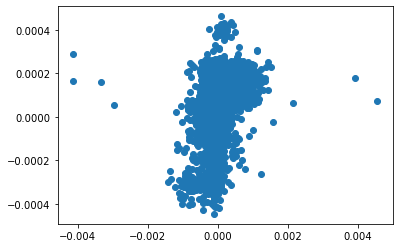

In [17]:
# The plate deature may be causing all the problems. Let's remove that and see what happens.
X_train_np=X_train.drop("plate",axis=1)#,inplace=True)
stars=X_train_np[X_train_np["class"]==0]
starz=y_train_label[X_train_np["class"]==0]
stars_predict=lin_reg.fit(stars,starz)
plt.scatter(starz,stars_predict.predict(stars))
plt.show()

In [18]:
#Still does not do well; let's look at the coefficients:
stars_co=stars_predict.coef_
ind=np.argsort(np.abs(stars_co))
for i in ind:
    print(X_train_full.columns[i],stars_co[i])


objid 1.6613260577500934e-23
specobjid -1.8674170796059332e-23
class 4.336808689942018e-19
rerun -2.168404344971009e-18
plate 1.0957377373504222e-08
redshift 3.4478863453480535e-08
run -3.2958682015582593e-07
field -7.770568494110689e-07
camcol -1.0289173073390317e-06
ra 1.1275922786619975e-06
dec -3.4744169575300975e-06
i -1.136754152087813e-05
z -1.9679301935311174e-05
g 2.9003971389493663e-05
u -3.266364155519467e-05
r 4.6210950302689214e-05


In [19]:
# That's not the problem. Let's see the score
print('Score= '+str(lin_reg.score(stars,starz)))


Score= 0.1403315266331404


Score= 0.3233106471941404


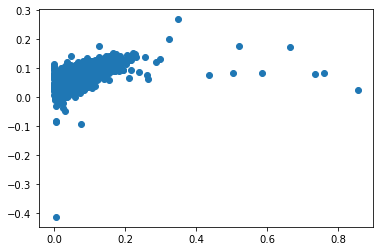

In [20]:
# Maybe there are too many types of stars to do well. Let's try it on galaxies.
galaxies=X_train_np[X_train_full["class"]==1]
galaxies_z=y_train_label[X_train_full["class"]==1]
galaxies_predict=lin_reg.fit(galaxies,galaxies_z)
plt.scatter(galaxies_z,galaxies_predict.predict(galaxies))
print('Score= '+str(lin_reg.score(galaxies,galaxies_z)))
plt.show()

class 0.0
specobjid -5.646598320143e-21
objid 1.1512499405519336e-20
rerun -1.532107773982716e-14
run -5.443096633225723e-06
plate -1.0355042887217423e-05
redshift 1.2639195541344239e-05
field -2.0390631985342032e-05
ra 6.181124798356826e-05
dec 9.793961779807645e-05
camcol 0.0005632759104630725
r -0.016762475244144558
z -0.02248550502482941
i -0.05316624705066812
u -0.0591465292860439
g 0.17300170308985688


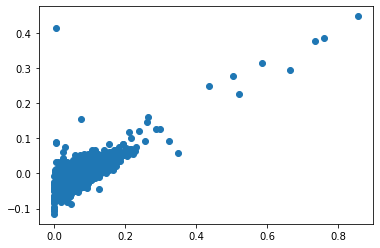

In [21]:
#That looks ok
gals_co=galaxies_predict.coef_
ind=np.argsort(np.abs(gals_co))
for i in ind:
    print(X_train_full.columns[i],gals_co[i])
plt.scatter(galaxies_z,(galaxies_z-galaxies_predict.predict(galaxies))/(1.+galaxies_z))
plt.show()

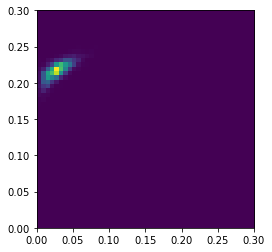

In [22]:
# Heatmap is cooler
heatmap, xedges, yedges = np.histogram2d(galaxies_z,galaxies_predict.predict(galaxies), bins=50)
extent = [0,.3,0,.3]

plt.clf()
plt.imshow(heatmap.T, extent=extent, origin='lower')
plt.show()

Finally try it on QSOs

Score= 0.30795875296727104


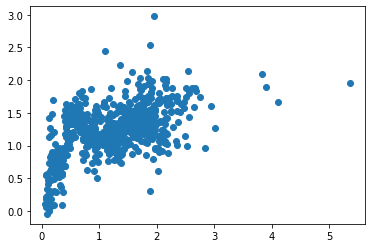

In [23]:
qso=X_train_np[X_train_full["class"]==2]
qso_z=y_train_label[X_train_full["class"]==2]
qso_predict=lin_reg.fit(qso,qso_z)
plt.scatter(qso_z,qso_predict.predict(qso))
print('Score= '+str(lin_reg.score(qso,qso_z)))
plt.show()

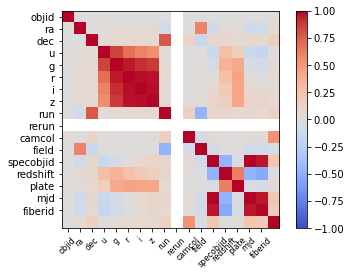

In [24]:
cp=plt.imshow(sdssc.corr(),cmap="coolwarm",norm=mpl.colors.Normalize(vmin=-1.,vmax=1.))
plt.colorbar(cp)
plt.xticks(range(sdss.select_dtypes(['number']).shape[1]), sdss.select_dtypes(['number']).columns, fontsize=8, rotation=45)
plt.yticks(range(sdss.select_dtypes(['number']).shape[1]), sdss.select_dtypes(['number']).columns, fontsize=10)
plt.show()

#Not very much really correlates to first order with redshift

In [25]:
interestingCorrDF=sdssc.corr().round(4).sort_values(by="redshift",key=lambda x: abs(x),ascending=False)[["redshift","r","i","z","g","u","class"]]

display(HTML(interestingCorrDF.style.applymap(lambda x: 'background-color: green' if x>.5 else "background-color: red" if (x<.1 and x>-.1) else '').render()))

,redshift,r,i,z,g,u,class
redshift,1.000000,0.441100,0.431400,0.424000,0.407600,0.163700,0.621000
class,0.621000,0.278700,0.205400,0.149400,0.357400,0.284500,1.000000
r,0.441100,1.000000,0.977700,0.969200,0.958100,0.692400,0.278700
i,0.431400,0.977700,1.000000,0.981500,0.907400,0.602600,0.205400
z,0.424000,0.969200,0.981500,1.000000,0.879600,0.551500,0.149400
g,0.407600,0.958100,0.907400,0.879600,1.000000,0.849200,0.357400
u,0.163700,0.692400,0.602600,0.551500,0.849200,1.000000,0.284500
dec,0.067000,0.063400,0.058300,0.056900,0.061900,0.035300,0.091200
run,0.059100,0.057300,0.049800,0.048300,0.058400,0.038200,0.100600
mjd,-0.058000,-0.009300,0.050900,0.095700,-0.092800,-0.168800,-0.527800


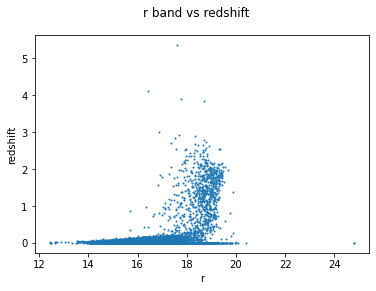

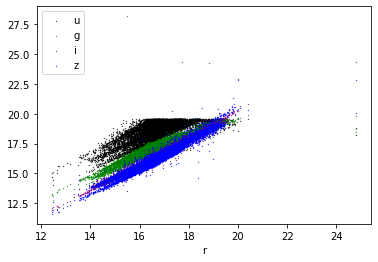

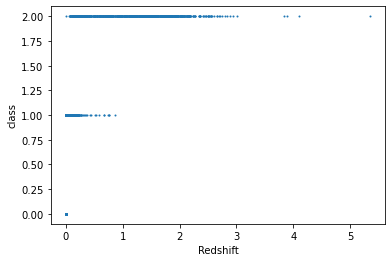

In [26]:
#Low redshifts(mostly stars) have pretty constant r. Higher redshift are much less consistent 
#(which is part of why linear models did so much better on galaxy and quasar datasets)
plt.scatter(sdssc["r"],sdssc["redshift"],s=1)
plt.suptitle("r band vs redshift")
plt.xlabel("r")
plt.ylabel("redshift")
plt.show()

#Bands are pretty correlated but seem to hit a very hard ceiling at 20 (which is strange)
plt.scatter(sdssc["r"],sdssc["u"],s=.1,color="black",label="u")
plt.scatter(sdssc["r"],sdssc["g"],s=.1,color="green",label="g")
plt.scatter(sdssc["r"],sdssc["i"],s=.1,color="purple",label="i")
plt.scatter(sdssc["r"],sdssc["z"],s=.1,color="blue",label="z")
plt.xlabel("r")
plt.legend()
plt.show()


#Linear regression is better at GAL/QSO classes simply because they are very spread out
plt.xlabel("Redshift")
plt.ylabel("class")
plt.scatter(sdssc["redshift"],sdssc["class"],s=1) 


Try applying some non-linear techniques

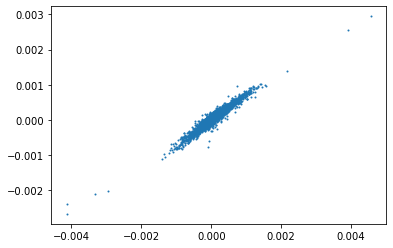

Score= 0.8833422285133548


In [27]:
# The plate deature may be causing all the problems. Let's remove that and see what happens.
from sklearn.ensemble import RandomForestRegressor


X_train_np=X_train.drop("plate",axis=1)#,inplace=True)
X_train_np=X_train_np.loc[:,:]

stars=X_train_np[X_train_np["class"]==0]
starz=y_train_label[X_train_np["class"]==0]


rf_reg=RandomForestRegressor()
stars_predict=rf_reg.fit(stars,starz)


plt.scatter(starz,stars_predict.predict(stars),s=1)
plt.show()

print('Score= '+str(rf_reg.score(stars,starz)))


Score= 0.908720756547341


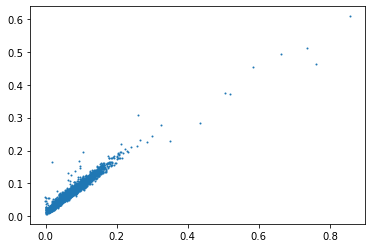

In [28]:
# Galaxies
galaxies=X_train_np[X_train_full["class"]==1]
galaxies_z=y_train_label[X_train_full["class"]==1]
galaxies_predict=rf_reg.fit(galaxies,galaxies_z)
plt.scatter(galaxies_z,galaxies_predict.predict(galaxies),s=1)
print('Score= '+str(rf_reg.score(galaxies,galaxies_z)))
plt.show()

Score= 0.9111733332336522


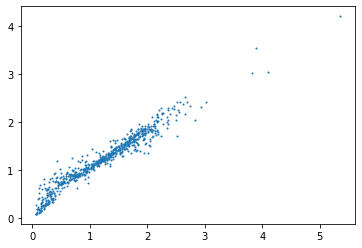

In [29]:
qso=X_train_np[X_train_full["class"]==2]
qso_z=y_train_label[X_train_full["class"]==2]
qso_predict=rf_reg.fit(qso,qso_z)
plt.scatter(qso_z,qso_predict.predict(qso),s=1)
print('Score= '+str(rf_reg.score(qso,qso_z)))
plt.show()

RandomForest works a lot better than linear regression and we can plug the entire test set in blindly

Score= 0.9750037529006591


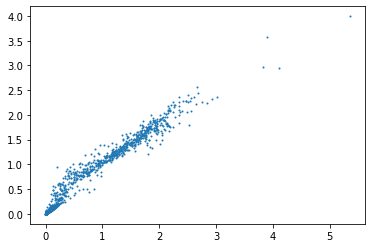

In [30]:
result=rf_reg.fit(X_train,y_train_label)
rf_reg.predict(X_train)
print('Score= '+str(rf_reg.score(X_train,y_train_label)))
plt.scatter(y_train_label,rf_reg.predict(X_train),s=1,label="Train")


Part of why is does so good is because we are giving it the all of the data so these scores tell us very little about whether the model is actually learning anything useful.  But even after splitting the data in 2 it does alright.

In [31]:
msk = np.random.rand(len(X_train)) < 0.8

X_trainset = X_train[msk]
y_trainset_label=y_train_label[msk]
X_testset = X_train[~msk]
y_testset_label=y_train_label[~msk]



Score= 0.9743763050438624
Score= 0.7638240279401568


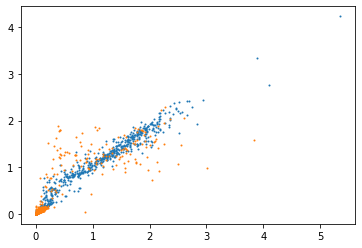

In [32]:
result=rf_reg.fit(X_trainset,y_trainset_label)
plt.scatter(y_trainset_label,rf_reg.predict(X_trainset),s=1,label="Train")
plt.scatter(y_testset_label,rf_reg.predict(X_testset),s=1,label="Test")
print('Score= '+str(rf_reg.score(X_trainset,y_trainset_label)))
print('Score= '+str(rf_reg.score(X_testset,y_testset_label)))

A single decision tree does slightly worse but comparably (but the forest isn't super important and this is actually readable)

These models do seem pretty variable between runs (with the same data) so the forest does help with that

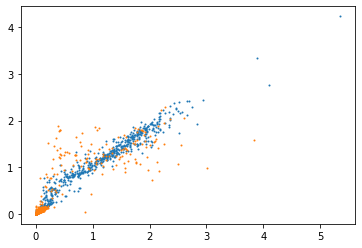

Train score= 0.7948375021072442
Test score= 0.7342175402919897


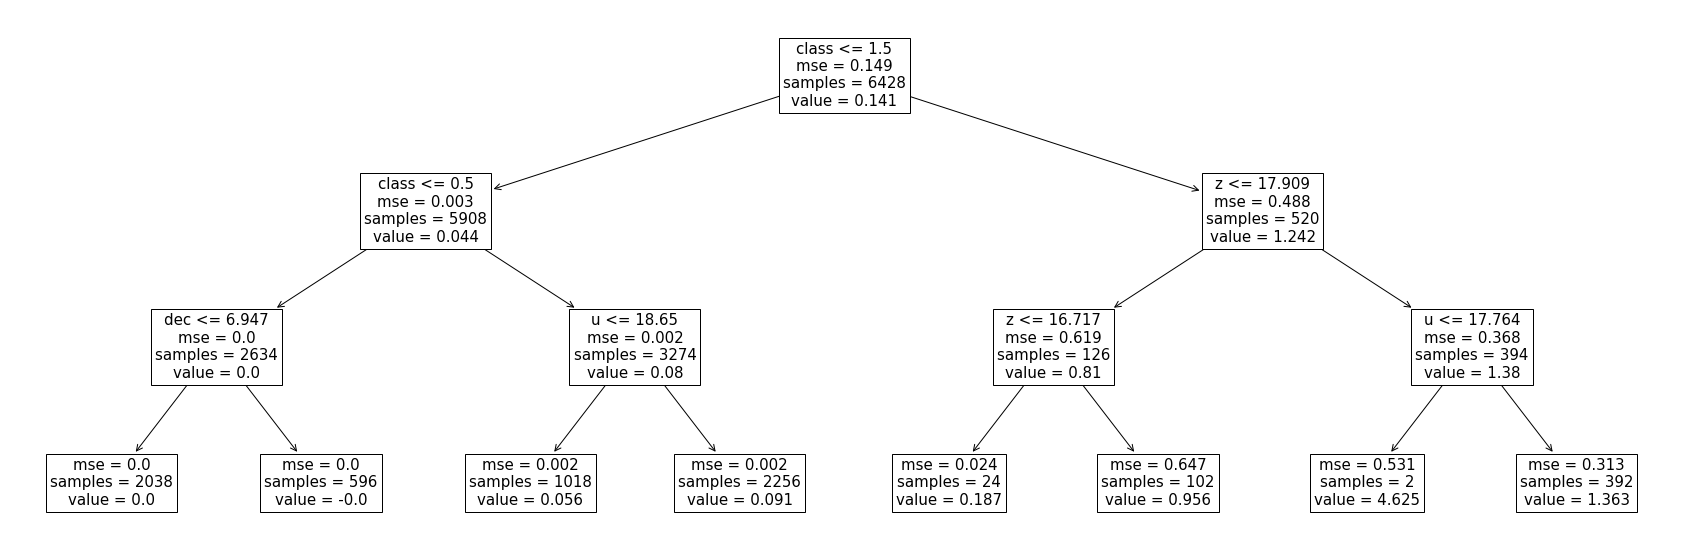

In [50]:
from sklearn.tree import DecisionTreeRegressor
import sklearn.tree as tree
DT_reg = DecisionTreeRegressor(random_state=42,max_depth=3)

result=DT_reg.fit(X_trainset,y_trainset_label)
plt.scatter(y_trainset_label,rf_reg.predict(X_trainset),s=1,label="Train")
plt.scatter(y_testset_label,rf_reg.predict(X_testset),s=1,label="Test")

plt.show()

print('Train score= '+str(DT_reg.score(X_trainset,y_trainset_label)))
print('Test score= '+str(DT_reg.score(X_testset,y_testset_label)))


#this model (for this random state) sorts by class first. Stars are basically randomly guessed on (sorted by dec)
#galaxies are sorted by u
#quasars are sorted by z and then z again (for small z values) or u (for large z values)
fig,ax=plt.subplots(1,1,figsize=(30,10))
tree.plot_tree(DT_reg,ax=ax,fontsize=15,feature_names=X_train.columns)
plt.show()

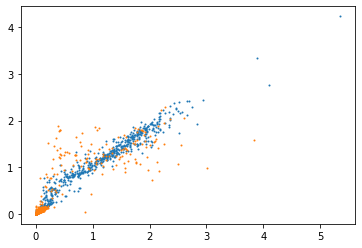

Train score= 1.0
Test score= 0.639356680353212


In [57]:
#Much eeper tree improves fitting for train set but makes it worse for test
DT_reg = DecisionTreeRegressor(random_state=42,max_depth=100)

result=DT_reg.fit(X_trainset,y_trainset_label)
plt.scatter(y_trainset_label,rf_reg.predict(X_trainset),s=1,label="Train")
plt.scatter(y_testset_label,rf_reg.predict(X_testset),s=1,label="Test")

plt.show()

print('Train score= '+str(DT_reg.score(X_trainset,y_trainset_label)))
print('Test score= '+str(DT_reg.score(X_testset,y_testset_label)))


plt.show()

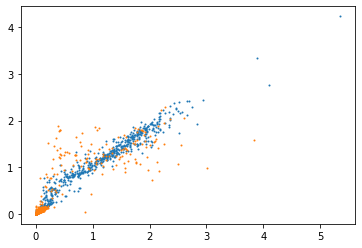

Train score= 0.7597467464585865
Test score= 0.7256682654564092


In [54]:
#Shallower tree also doesn't help
DT_reg = DecisionTreeRegressor(random_state=42,max_depth=2)

result=DT_reg.fit(X_trainset,y_trainset_label)
plt.scatter(y_trainset_label,rf_reg.predict(X_trainset),s=1,label="Train")
plt.scatter(y_testset_label,rf_reg.predict(X_testset),s=1,label="Test")

plt.show()

print('Train score= '+str(DT_reg.score(X_trainset,y_trainset_label)))
print('Test score= '+str(DT_reg.score(X_testset,y_testset_label)))


plt.show()

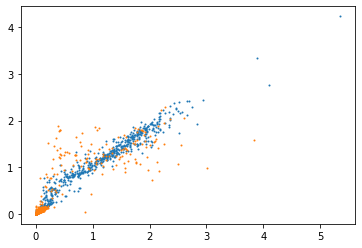

Train score= 0.8486493744722694
Test score= 0.762583018121362


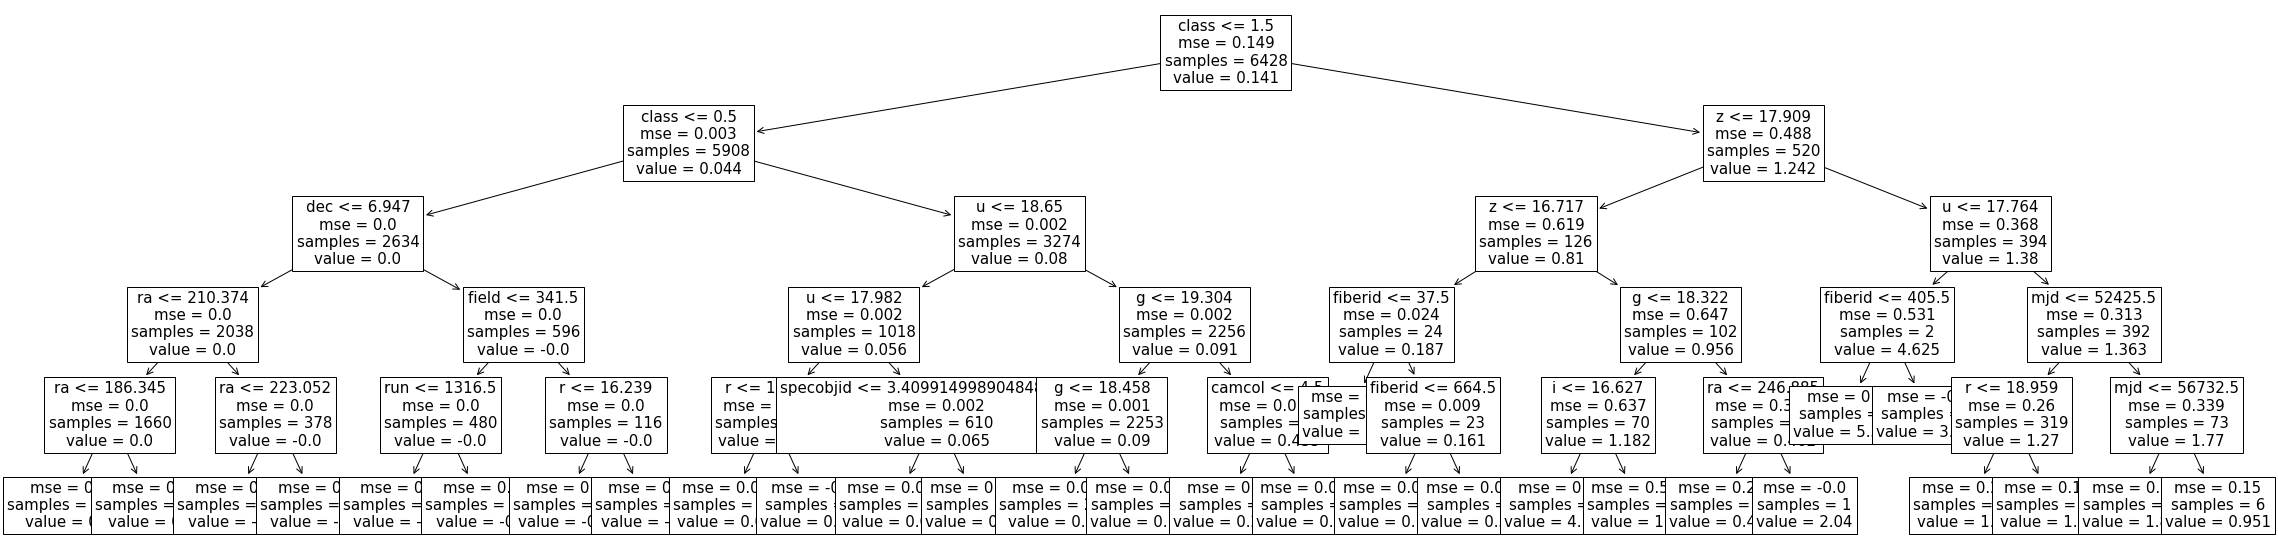

In [56]:

DT_reg = DecisionTreeRegressor(random_state=42,max_depth=5)

result=DT_reg.fit(X_trainset,y_trainset_label)
plt.scatter(y_trainset_label,rf_reg.predict(X_trainset),s=1,label="Train")
plt.scatter(y_testset_label,rf_reg.predict(X_testset),s=1,label="Test")

plt.show()

print('Train score= '+str(DT_reg.score(X_trainset,y_trainset_label)))
print('Test score= '+str(DT_reg.score(X_testset,y_testset_label)))


fig,ax=plt.subplots(1,1,figsize=(40,10))
tree.plot_tree(DT_reg,ax=ax,fontsize=15,feature_names=X_train.columns)
plt.show()